In [366]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import plotly.express as px
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', 50)

In [367]:
df = pd.read_csv("data.csv")


In [368]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [369]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [371]:
df.isnull().sum()/df.shape[0]*100

,0
date,0.0
price,0.0
bedrooms,0.0
bathrooms,0.0
sqft_living,0.0
sqft_lot,0.0
floors,0.0
waterfront,0.0
view,0.0
condition,0.0


In [372]:
df['statezip'] = df['statezip'].str.extract(r'(\d+)').astype(float).astype('Int64')

In [373]:
le = LabelEncoder()

In [374]:
df['city'] = le.fit_transform(df['city'])

In [375]:
df['statezip'] = le.fit_transform(df['statezip'])

In [376]:
df['is_renovated'] = df['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)

In [377]:
from datetime import datetime
current_year = datetime.now().year

df['years_since_renovated'] = df.apply(lambda row: current_year - row['yr_built'] if row['yr_renovated'] == 0 else current_year - row['yr_renovated'], axis=1)

In [378]:
df = df.drop(columns=['street', 'country', 'date', 'yr_renovated'])

In [379]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,city,statezip,is_renovated,years_since_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,36,62,1,20
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,35,58,0,104
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,18,26,0,59
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,3,7,0,62
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,31,31,1,33


In [380]:
X = df.drop(columns=['price'])
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, shuffle=True)

In [381]:
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler_y.transform(y_test.values.reshape(-1, 1))

In [382]:
class LinearRegression:
    def __init__(self, lr=0.01, n_iters=10000, convergence_tol=1e-6):
        self.lr = lr
        self.n_iters = n_iters
        self.convergence_tol = convergence_tol
        self.W = None
        self.b = None

    def initialize_parameters(self, n_features):
        self.W = np.random.randn(n_features, 1)
        self.b = 0

    def forward(self, X):
        return np.dot(X, self.W) + self.b

    def compute_cost(self, predictions):
        m = len(predictions)
        errors = predictions - self.y
        cost = np.dot(errors.T, errors) / (2 * m)
        return cost.item()

    def backward(self, X, predictions):
        m = len(predictions)
        self.dW = np.dot(X.T, (predictions - self.y)) / m
        self.db = np.sum(predictions - self.y) / m

    def fit(self, X, y, plot_cost=True):
        self.X = X
        self.y = y
        self.initialize_parameters(X.shape[1])
        costs = []

        for i in range(self.n_iters):
            predictions = self.forward(X)
            cost = self.compute_cost(predictions)
            self.backward(X, predictions)

            self.W -= self.lr * self.dW
            self.b -= self.lr * self.db
            costs.append(cost)

            if i % 100 == 0:
                print(f'Iteration: {i}, Cost: {cost:.4f}')

            if i > 0 and abs(costs[-1] - costs[-2]) < self.convergence_tol:
                print(f'✅ Converged at iteration {i}, Cost: {cost:.4f}')
                break

        if plot_cost:
            fig = px.line(y=costs, title="Cost vs Iteration", template="plotly_dark")
            fig.update_layout(
                title_font_color="#41BEE9",
                xaxis=dict(color="#41BEE9", title="Iterations"),
                yaxis=dict(color="#41BEE9", title="Cost")
            )
            fig.show()

    def predict(self, X):
        return self.forward(X)



In [388]:
lr = LinearRegression(lr=0.01)
lr.fit(X_train, y_train, 10000)

Iteration: 0, Cost: 3.8833
Iteration: 100, Cost: 1.1454
Iteration: 200, Cost: 0.7259
Iteration: 300, Cost: 0.5670
Iteration: 400, Cost: 0.4905
Iteration: 500, Cost: 0.4509
Iteration: 600, Cost: 0.4294
Iteration: 700, Cost: 0.4173
Iteration: 800, Cost: 0.4104
Iteration: 900, Cost: 0.4063
Iteration: 1000, Cost: 0.4039
Iteration: 1100, Cost: 0.4024
Iteration: 1200, Cost: 0.4015
Iteration: 1300, Cost: 0.4009
Iteration: 1400, Cost: 0.4006
Iteration: 1500, Cost: 0.4004
Iteration: 1600, Cost: 0.4002
✅ Converged at iteration 1615, Cost: 0.4002


In [394]:
y_pred_scaled = lr.predict(X_test)

y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test)

In [395]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("RMSE:", np.sqrt(mean_squared_error(y_test_actual, y_pred)))
print("MAE :", mean_absolute_error(y_test_actual, y_pred))

RMSE: 229136.18878239673
MAE : 157353.92789907748


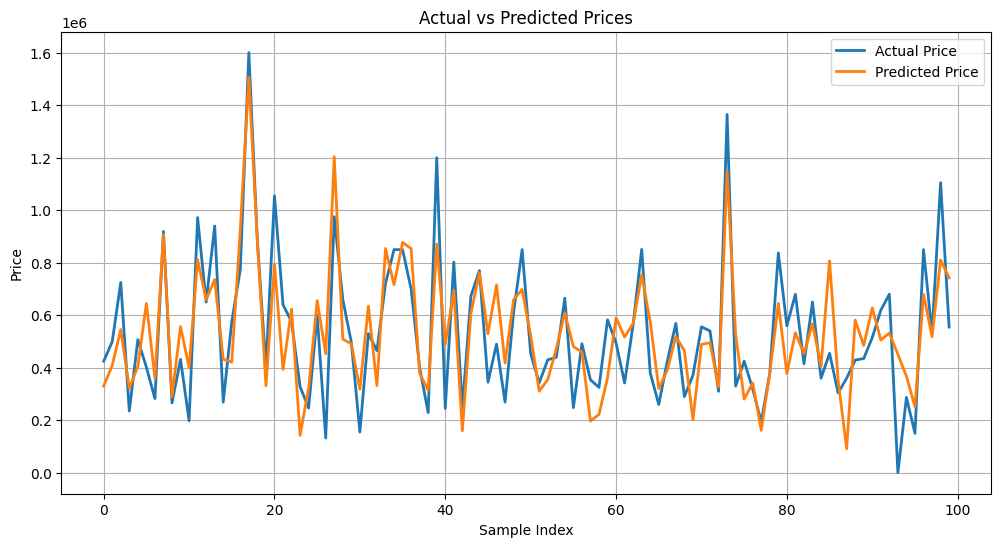

In [397]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test_actual[:100], label='Actual Price', linewidth=2)
plt.plot(y_pred[:100], label='Predicted Price', linewidth=2)
plt.title("Actual vs Predicted Prices")
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

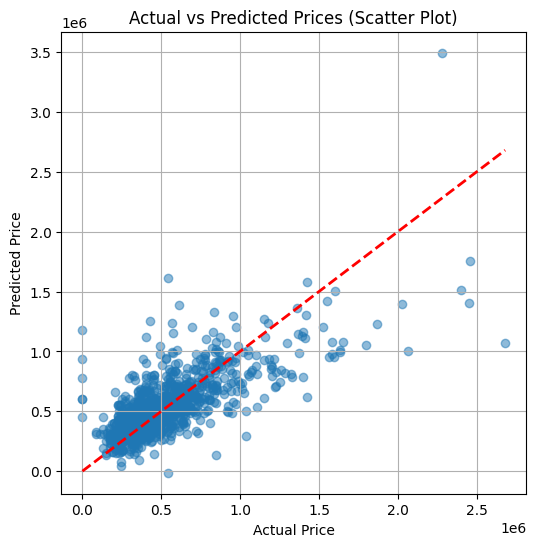

In [398]:
plt.figure(figsize=(6,6))
plt.scatter(y_test_actual, y_pred, alpha=0.5)
plt.plot([y_test_actual.min(), y_test_actual.max()],
         [y_test_actual.min(), y_test_actual.max()],
         'r--', lw=2)
plt.title("Actual vs Predicted Prices (Scatter Plot)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.show()

In [399]:
import plotly.express as px

fig = px.scatter(
    x=y_test_actual.flatten(),
    y=y_pred.flatten(),
    labels={'x': 'Actual Price', 'y': 'Predicted Price'},
    title="Actual vs Predicted Prices (Interactive)"
)

fig.add_shape(
    type="line",
    x0=y_test_actual.min(), y0=y_test_actual.min(),
    x1=y_test_actual.max(), y1=y_test_actual.max(),
    line=dict(color="red", dash="dash")
)

fig.show()